# Model Selection with updated Dataset

## Google Colab Setup
Run the cell below first to set up the environment.

In [ ]:
# Google Colab Setup - Run this cell first!
import os

IN_COLAB = 'google.colab' in str(get_ipython()) if 'get_ipython' in dir() else False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_DIR = '/content/drive/MyDrive/bioai_data'
    os.chdir(DATA_DIR)
    print(f"Working directory: {os.getcwd()}")
    print(f"Files available: {os.listdir('.')}")
else:
    print("Not running in Colab - using local paths")

## Data Preprocessing

In [ ]:
import pandas as pd
# Load dataset
methexpr_df = pd.read_csv('ml_with_gene_expr.csv.gz',
compression='gzip',
index_col=0,
low_memory=False)
# Separate feature types
metadata_cols = ['primary site', 'primary histology', 'cosmic_id']
methylation_cols = [col for col in methexpr_df.columns if col.startswith('cg')]
expression_cols = [col for col in methexpr_df.columns if col.startswith('expr_')]
# Extract subsets
X_meth = methexpr_df[methylation_cols] # 1018 x 10000
X_expr = methexpr_df[expression_cols] # 1018 x 4956
metadata = methexpr_df[metadata_cols]

In [2]:
methexpr_df

,primary site,primary histology,cosmic_id,cg00944421,cg14557185,cg00989853,cg24702147,cg06723863,cg27174108,cg14481208,...,expr_JAM2,expr_SEPT1,expr_PEX7,expr_RFC5,expr_PENK,expr_ACSL3,expr_E2F3,expr_TM7SF3,expr_TTC14,expr_SFT2D1
697,blood,lymphoblastic_leukemia,906800.0,0.995309,0.999933,0.992589,0.993804,1.000000,0.989910,0.991938,...,5.239927,5.252104,6.627870,8.496907,2.766693,8.469268,7.597450,9.902359,6.926724,9.378083
5637,urogenital_system,bladder,687452.0,0.010293,0.009700,0.000000,0.019619,0.001614,0.006393,0.037711,...,3.332692,3.060993,7.982724,7.489100,2.894963,9.886996,10.607952,8.731725,5.143855,9.814031
201T,lung,lung_NSCLC_adenocarcinoma,1287381.0,0.821831,0.004671,0.091291,0.013206,0.016155,0.003981,0.008285,...,2.868300,3.043228,8.197493,5.927889,2.624597,10.051639,5.640785,9.304462,7.920562,10.083233
22RV1,urogenital_system,prostate,924100.0,0.005373,0.995386,0.000000,0.005776,0.004595,0.985648,0.009981,...,3.137277,3.234577,8.631361,7.250483,2.815874,9.578729,5.241522,9.666908,7.436008,6.994852
23132-87,digestive_system,stomach,910924.0,0.000000,0.935833,0.000000,0.008962,0.002041,0.002005,0.026887,...,3.104617,3.122160,9.548485,6.217373,2.824991,9.510297,5.226579,10.328542,6.025421,10.055381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAPC,pancreas,pancreas,909904.0,0.009136,0.007066,0.000898,0.015999,0.014864,0.008737,0.019683,...,3.160740,3.239356,7.852246,7.753827,2.996260,10.103385,6.098732,9.578503,6.843696,10.556830
YH-13,nervous_system,glioma,909905.0,0.963341,0.005739,0.989838,0.992368,0.993164,0.989321,0.982065,...,4.127248,3.171536,7.192872,7.492028,2.968564,8.663977,6.349145,8.770447,6.736737,9.609865
YKG-1,nervous_system,glioma,687592.0,0.996477,0.007576,0.986879,0.996015,0.993360,0.996321,0.992586,...,3.164598,3.154400,7.742972,6.738969,2.757865,8.894755,6.836061,9.024287,7.312585,9.803229
YT,blood,lymphoid_neoplasm other,946358.0,1.000000,0.998999,0.998225,0.987221,1.000000,0.995139,0.990399,...,2.906149,5.274671,7.092308,7.250872,3.009202,9.053290,6.760212,10.681652,8.856739,9.908252


In [5]:
expression_cols

['expr_RPS4Y1',
 'expr_KRT19',
 'expr_VIM',
 'expr_S100P',
 'expr_TACSTD2',
 'expr_TGFBI',
 'expr_TM4SF1',
 'expr_SRGN',
 'expr_CAV1',
 'expr_DKK1',
 'expr_C19orf33',
 'expr_KRT8',
 'expr_SPINT2',
 'expr_NNMT',
 'expr_EPCAM',
 'expr_BEX1',
 'expr_IFITM3',
 'expr_UCHL1',
 'expr_MYOF',
 'expr_SPOCK1',
 'expr_BASP1',
 'expr_MAL2',
 'expr_HLA-DRA',
 'expr_CYR61',
 'expr_DSP',
 'expr_GNG11',
 'expr_SLPI',
 'expr_MGST1',
 'expr_FN1',
 'expr_PXDN',
 'expr_HSPA1A',
 'expr_SPP1',
 'expr_LGALS1',
 'expr_LGALS3',
 'expr_BST2',
 'expr_ANXA1',
 'expr_NGFRAP1',
 'expr_PRSS23',
 'expr_IFI27',
 'expr_TPD52L1',
 'expr_GDF15',
 'expr_ANXA3',
 'expr_NUPR1',
 'expr_KRT7',
 'expr_S100A14',
 'expr_S100A16',
 'expr_LCN2',
 'expr_MIR205HG',
 'expr_EFEMP1',
 'expr_SPARC',
 'expr_AKR1C1',
 'expr_BEX4',
 'expr_UCA1',
 'expr_HLA-DPA1',
 'expr_TSPAN8',
 'expr_GYPC',
 'expr_LCP1',
 'expr_ESRP1',
 'expr_IGFBP3',
 'expr_RAB25',
 'expr_CYBA',
 'expr_TUBB2B',
 'expr_CAV2',
 'expr_ALDH1A1',
 'expr_CLEC2B',
 'expr_TFPI',

In [3]:
"expr_MGMT" in set(expression_cols)

True

In [4]:
methexpr_df['expr_MGMT']

697         6.853894
5637        2.838968
201T        5.811659
22RV1       2.763440
23132-87    8.364413
              ...   
YAPC        8.990827
YH-13       7.317325
YKG-1       7.217328
YT          7.703072
ZR-75-30    6.998487
Name: expr_MGMT, Length: 987, dtype: float64

In [ ]:
response_df = pd.read_csv('ML_dataset_methylation_drug_response.csv.gz',
				 compression='gzip',
				 index_col=0,
				 low_memory=False)


drug_cols = [col for col in response_df.columns if col not in metadata_cols and col not in methylation_cols]

y_all_drugs = response_df[drug_cols]  # 1018 x 265

y_all_drugs

In [9]:
df = methexpr_df.join(y_all_drugs, how='inner', lsuffix='_caller', rsuffix='_other')
df

,primary site,primary histology,cosmic_id,cg00944421,cg14557185,cg00989853,cg24702147,cg06723863,cg27174108,cg14481208,...,ZG-10,ZL049,ZL109,ZM447439,ZSTK474,Zibotentan,"eEF2K Inhibitor, A-484954",kb NB 142-70,rTRAIL,torin2
697,blood,lymphoblastic_leukemia,906800.0,0.995309,0.999933,0.992589,0.993804,1.000000,0.989910,0.991938,...,NaN,1.389685,-1.238606,-0.364143,-2.428664,4.825729,4.690386,0.684583,-3.045563,NaN
5637,urogenital_system,bladder,687452.0,0.010293,0.009700,0.000000,0.019619,0.001614,0.006393,0.037711,...,NaN,2.053874,0.046212,0.556022,0.239659,5.144572,5.273391,2.519340,-2.889220,NaN
22RV1,urogenital_system,prostate,924100.0,0.005373,0.995386,0.000000,0.005776,0.004595,0.985648,0.009981,...,2.216771,3.456567,0.704177,3.415833,-0.571660,5.886388,5.891054,2.989656,-0.586829,NaN
23132-87,digestive_system,stomach,910924.0,0.000000,0.935833,0.000000,0.008962,0.002041,0.002005,0.026887,...,NaN,3.582629,-0.153728,3.171768,0.052341,5.419213,5.460743,2.988242,-0.347357,NaN
42-MG-BA,nervous_system,glioma,687561.0,0.994996,0.000000,1.000000,1.000000,1.000000,1.000000,0.995498,...,NaN,2.995327,-0.980930,1.339098,2.235509,5.494359,5.566457,3.082294,-1.651262,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAPC,pancreas,pancreas,909904.0,0.009136,0.007066,0.000898,0.015999,0.014864,0.008737,0.019683,...,NaN,5.121817,1.659229,2.946571,2.190982,6.153842,6.538489,3.625790,-1.416428,NaN
YH-13,nervous_system,glioma,909905.0,0.963341,0.005739,0.989838,0.992368,0.993164,0.989321,0.982065,...,0.712498,2.348748,-0.409551,1.514446,0.242131,5.164013,5.539282,1.610461,0.131337,NaN
YKG-1,nervous_system,glioma,687592.0,0.996477,0.007576,0.986879,0.996015,0.993360,0.996321,0.992586,...,NaN,2.297815,-0.086315,1.239723,0.718917,5.048165,5.600037,2.003123,-1.560052,NaN
YT,blood,lymphoid_neoplasm other,946358.0,1.000000,0.998999,0.998225,0.987221,1.000000,0.995139,0.990399,...,NaN,2.737701,0.298806,1.466147,-3.425817,5.165823,5.211461,1.620578,-0.557084,NaN


In [10]:
drug = 'Avagacestat'
y = df[drug].dropna()  # Remove missing values
y

697         3.541041
5637        4.040710
22RV1       3.515197
23132-87    4.091940
42-MG-BA    4.047185
              ...   
YAPC        4.613361
YH-13       4.222055
YKG-1       4.418124
YT          2.715923
ZR-75-30    5.503293
Name: Avagacestat, Length: 896, dtype: float64

In [11]:
feature_cols = methylation_cols + expression_cols
X = df[feature_cols]
X_subset = X.loc[y.index].dropna(axis=1)  # Ensure no NaNs in features as well
y_subset = y.loc[X_subset.index]



In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

In [14]:
def add_benchmark_result(model, model_name, X_test, y_test, X_train, y_train):
	# Training performance
	y_pred_train = model.predict(X_train)
	testing_mse = -cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
	training_mse = mean_squared_error(y_train, y_pred_train)
	training_r2 = r2_score(y_train, y_pred_train)
	testing_r2 = r2_score(y_test, model.predict(X_test))

	return [model_name, training_mse, testing_mse.mean(), training_r2, testing_r2]

In [15]:
benchmark_results = pd.DataFrame(columns=['Model', 'training MSE', 'average testing MSE', 'training R^2','testing R^2'])

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler

In [17]:

pca = PCA(n_components=15)
x_scaler = RobustScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_train_scaled = pca.fit_transform(X_train_scaled)

# model = Ridge()
# scores = cross_val_score(model, X_scaled, y_train, cv=5, scoring='r2')
# model.fit(X_train_scaled, y_train)
# y_scaler = StandardScaler()
# y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

## Data Exploration 

To if the data is linear or non-linear?

In [18]:
y.index

Index(['697', '5637', '22RV1', '23132-87', '42-MG-BA', '451LU', '639-V',
       '647-V', '769-P', '786-0',
       ...
       'WM278', 'WM35', 'WM793B', 'WSU-DLCL2', 'WSU-NHL', 'YAPC', 'YH-13',
       'YKG-1', 'YT', 'ZR-75-30'],
      dtype='object', length=896)

In [21]:
X_expr

,expr_RPS4Y1,expr_KRT19,expr_VIM,expr_S100P,expr_TACSTD2,expr_TGFBI,expr_TM4SF1,expr_SRGN,expr_CAV1,expr_DKK1,...,expr_JAM2,expr_SEPT1,expr_PEX7,expr_RFC5,expr_PENK,expr_ACSL3,expr_E2F3,expr_TM7SF3,expr_TTC14,expr_SFT2D1
697,12.573974,3.261367,12.652829,3.282940,3.221927,4.384763,2.831966,3.272828,3.280339,6.536384,...,5.239927,5.252104,6.627870,8.496907,2.766693,8.469268,7.597450,9.902359,6.926724,9.378083
5637,10.486427,12.482335,11.724988,6.528566,10.700406,10.774644,9.799508,2.996163,11.657541,7.964236,...,3.332692,3.060993,7.982724,7.489100,2.894963,9.886996,10.607952,8.731725,5.143855,9.814031
201T,12.723298,6.442561,9.494026,12.938962,2.846889,10.781516,12.221572,11.298257,7.401941,3.407422,...,2.868300,3.043228,8.197493,5.927889,2.624597,10.051639,5.640785,9.304462,7.920562,10.083233
22RV1,12.005096,10.250132,7.409285,13.480581,2.955979,3.270763,2.932613,3.346357,3.164307,6.325388,...,3.137277,3.234577,8.631361,7.250483,2.815874,9.578729,5.241522,9.666908,7.436008,6.994852
23132-87,12.037311,12.489467,3.466505,13.729743,9.140491,4.427674,3.648807,3.222594,3.316925,2.873951,...,3.104617,3.122160,9.548485,6.217373,2.824991,9.510297,5.226579,10.328542,6.025421,10.055381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAPC,11.706907,12.399600,8.310473,12.307949,10.593732,10.699073,11.695530,2.972310,11.204241,10.923055,...,3.160740,3.239356,7.852246,7.753827,2.996260,10.103385,6.098732,9.578503,6.843696,10.556830
YH-13,3.079912,8.198396,12.835556,3.766602,3.082798,12.503706,11.388092,8.891957,11.983793,4.460423,...,4.127248,3.171536,7.192872,7.492028,2.968564,8.663977,6.349145,8.770447,6.736737,9.609865
YKG-1,3.310185,4.181137,12.831082,8.092991,2.897813,11.927361,10.919837,3.192500,9.626697,12.615605,...,3.164598,3.154400,7.742972,6.738969,2.757865,8.894755,6.836061,9.024287,7.312585,9.803229
YT,11.368446,3.803154,12.323882,3.287796,3.165175,3.990835,3.015546,12.030208,3.125977,2.729643,...,2.906149,5.274671,7.092308,7.250872,3.009202,9.053290,6.760212,10.681652,8.856739,9.908252


In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

X_meth = methexpr_df[methylation_cols].loc[y.index]
X_expr = methexpr_df[expression_cols].loc[y.index]

y = (y - y.mean()) / y.std(ddof=0)

methx_scaler = StandardScaler()
exprx_scaler = StandardScaler()

X_meth_scaled = methx_scaler.fit_transform(X_meth)
X_expr_scaled = exprx_scaler.fit_transform(X_expr)

corr_meth = X_meth_scaled.T @ y / (len(y) - 1)
corr_expr = X_expr_scaled.T @ y / (len(y) - 1)

corr_meth = pd.Series(corr_meth, index=methylation_cols)
corr_expr = pd.Series(corr_expr, index=expression_cols)

top_meth = corr_meth.abs().sort_values(ascending=False).head(50)
top_expr = corr_expr.abs().sort_values(ascending=False).head(50)

top_meth.head(), top_expr.head()

(cg24603464    0.262332
 cg08564661    0.240311
 cg08183141    0.233064
 cg02501827    0.226775
 cg23919479    0.226578
 dtype: float64,
 expr_TRAT1      0.266460
 expr_GNA11      0.265240
 expr_SEPT6      0.252849
 expr_PTPRCAP    0.245800
 expr_GIMAP2     0.244140
 dtype: float64)

In [23]:
corr_expr

expr_RPS4Y1    -0.052846
expr_KRT19      0.155185
expr_VIM       -0.067668
expr_S100P      0.069980
expr_TACSTD2    0.049917
                  ...   
expr_ACSL3      0.064789
expr_E2F3      -0.079305
expr_TM7SF3     0.020857
expr_TTC14     -0.003687
expr_SFT2D1    -0.035992
Length: 5000, dtype: float64

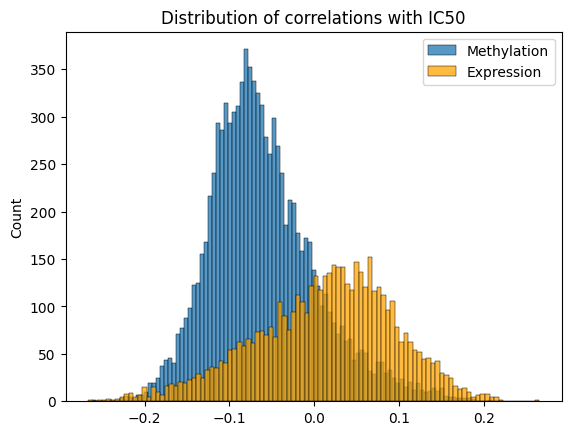

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(corr_meth, bins=100, label='Methylation')
sns.histplot(corr_expr, bins=100, color='orange', label='Expression')
plt.legend()
plt.title("Distribution of correlations with IC50")
plt.show()

#### Heatmap

In [155]:
X_meth_scaled.mean(axis = 0)

array([ 8.72318091e-17, -3.17206578e-17, -2.87468462e-17, ...,
        7.53365624e-17,  1.78428700e-17,  5.15460690e-17], shape=(10000,))

In [139]:
corr_meth = corr_meth[~np.isnan(corr_meth)]

In [180]:
X_expr = methexpr_df[expression_cols].loc[y.index].dropna(axis=1)

In [181]:
X_expr_scaled = exprx_scaler.fit_transform(X_expr)
X_expr_scaled

array([[ 1.68620535, -1.09226489,  0.80124758, ...,  0.69666019,
        -0.35914064, -0.58501975],
       [ 1.15488741,  1.25891191,  0.5519179 , ..., -0.80891083,
        -2.61020055, -0.03405782],
       [ 1.54141581,  0.68974148, -0.60779906, ...,  0.39384309,
         0.28388396, -3.59700485],
       ...,
       [-0.67159386, -0.85774064,  0.84914784, ..., -0.43264284,
         0.12804874, -0.04770965],
       [ 1.37937697, -0.95411928,  0.71285291, ...,  1.69892177,
         2.07770638,  0.0850207 ],
       [-0.70994625,  1.22063838, -1.6795365 , ...,  0.06583592,
        -0.19317772,  0.01382338]], shape=(896, 5000))

In [24]:
X_expr_mean = np.nanmean(X_expr_scaled, axis = 0)

In [25]:
X_meth_mean = np.nanmean(X_meth_scaled, axis = 0)

In [28]:
X_expr_mean.min(), X_expr_mean.max()

(np.float64(-1.966680786478849e-15), np.float64(2.827103630563345e-15))

In [190]:
X_meth_mean.min(), X_meth_mean.max()

(np.float64(-5.333035600431556e-16), np.float64(4.639146210040833e-16))

In [30]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

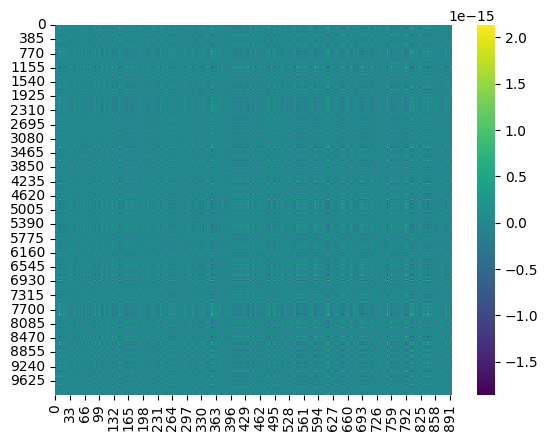

In [31]:
sns.heatmap(np.outer(X_meth_mean, y), cmap='viridis')

<Axes: >

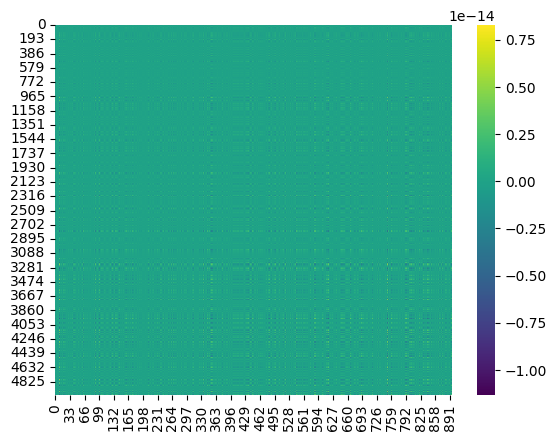

In [32]:
sns.heatmap(np.outer(X_expr_mean, y), cmap='viridis')

<Axes: >

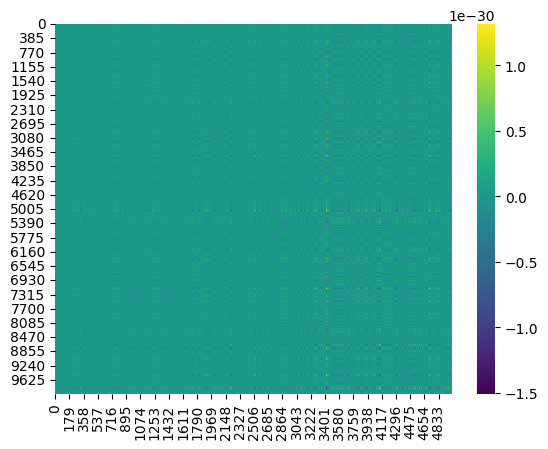

In [35]:
sns.heatmap(np.outer(X_meth_mean, X_expr_mean), cmap='viridis',)

## Linear Regression methods

In [53]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV, HalvingGridSearchCV

In [54]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.cross_decomposition import PLSRegression



param_grid = {
	'n_components': range(2, 15)
}

search = HalvingGridSearchCV(
    estimator=PLSRegression(),         # PLS scales X,y by default
    param_grid=param_grid,
    factor=2,
    resource='n_samples',
    max_resources='auto',
    min_resources='smallest',
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1,                         # optional, speed-up
    refit=True
)

search.fit(X_train, y_train)

model = search.best_estimator_

benchmark_result = add_benchmark_result(model, 'PLSRegression with HalvingGridSearchCV', X_test, y_test, X_train, y_train)
benchmark_results.loc[len(benchmark_results)] = benchmark_result
benchmark_results

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 7
min_resources_: 10
max_resources_: 716
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 13
n_resources: 10
Fitting 5 folds for each of 13 candidates, totalling 65 fits


/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2

[CV] END .....................................n_components=3; total time=   0.4s
[CV] END .....................................n_components=2; total time=   0.5s
[CV] END .....................................n_components=2; total time=   0.4s
[CV] END .....................................n_components=2; total time=   0.4s
[CV] END .....................................n_components=3; total time=   0.5s
[CV] END .....................................n_components=3; total time=   0.4s
[CV] END .....................................n_components=2; total time=   0.5s
[CV] END .....................................n_components=2; total time=   0.5s


/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2

[CV] END .....................................n_components=3; total time=   0.3s
[CV] END .....................................n_components=3; total time=   0.3s
[CV] END .....................................n_components=4; total time=   0.3s
[CV] END .....................................n_components=4; total time=   0.3s
[CV] END .....................................n_components=4; total time=   0.4s
[CV] END .....................................n_components=4; total time=   0.4s
[CV] END .....................................n_components=5; total time=   0.4s
[CV] END .....................................n_components=4; total time=   0.4s


/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2

[CV] END .....................................n_components=5; total time=   0.3s
[CV] END .....................................n_components=5; total time=   0.3s
[CV] END .....................................n_components=5; total time=   0.3s
[CV] END .....................................n_components=5; total time=   0.3s
[CV] END .....................................n_components=6; total time=   0.3s
[CV] END .....................................n_components=6; total time=   0.3s
[CV] END .....................................n_components=6; total time=   0.3s
[CV] END .....................................n_components=6; total time=   0.3s


/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:308: UserWarning: y residual is constant at iteration 6
  warnings.warn(f"y residual is constant at iteration {k}")
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:308: UserWarning: y residual is constant at iteration 7
  warnings.warn(f"y residual is constant at iteration {k}")
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defin

[CV] END .....................................n_components=8; total time=   0.2s
[CV] END .....................................n_components=6; total time=   0.3s
[CV] END .....................................n_components=7; total time=   0.3s
[CV] END .....................................n_components=7; total time=   0.3s
[CV] END .....................................n_components=7; total time=   0.3s
[CV] END .....................................n_components=7; total time=   0.3s
[CV] END .....................................n_components=7; total time=   0.3s
[CV] END .....................................n_components=8; total time=   0.3s


/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:308: UserWarning: y residual is constant at iteration 7
  warnings.warn(f"y residual is constant at iteration {k}")
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:308: UserWarning: y residual is constant at iteration 7
  warnings.warn(f"y residual is constant at iteration {k}")


[CV] END .....................................n_components=9; total time=   0.2s
[CV] END .....................................n_components=9; total time=   0.2s
[CV] END .....................................n_components=9; total time=   0.2s
[CV] END .....................................n_components=9; total time=   0.2s
[CV] END .....................................n_components=8; total time=   0.3s
[CV] END .....................................n_components=9; total time=   0.2s


/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py:308: UserWarning: y residual is constant at iteration 7
  warnings.warn(f"y residual is constant at iteration {k}")
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END .....................................n_components=8; total time=   0.3s
[CV] END ....................................n_components=10; total time=   0.2s
[CV] END ....................................n_components=10; total time=   0.2s
[CV] END ....................................n_components=10; total time=   0.2s
[CV] END ....................................n_components=10; total time=   0.2s
[CV] END .....................................n_components=8; total time=   0.3s
[CV] END ....................................n_components=10; total time=   0.2s
[CV] END ....................................n_components=11; total time=   0.2s
[CV] END ....................................n_components=11; total time=   0.1s
[CV] END ....................................n_components=11; total time=   0.2s
[CV] END ....................................n_components=11; total time=   0.2s
[CV] END ....................................n_components=11; total time=   0.2s
[CV] END ...................

/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
31 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/cross_decomposition/_pls.py", line 653, in fit
    super().fit(X, y)
  File "/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, 

[CV] END .....................................n_components=8; total time=   0.4s
[CV] END .....................................n_components=8; total time=   0.4s
[CV] END .....................................n_components=8; total time=   0.4s
[CV] END .....................................n_components=8; total time=   0.4s
[CV] END .....................................n_components=8; total time=   0.4s
[CV] END .....................................n_components=9; total time=   0.4s
[CV] END .....................................n_components=9; total time=   0.4s
[CV] END .....................................n_components=9; total time=   0.4s
[CV] END .....................................n_components=9; total time=   0.3s
[CV] END .....................................n_components=9; total time=   0.4s
[CV] END ....................................n_components=10; total time=   0.4s
[CV] END ....................................n_components=10; total time=   0.4s
[CV] END ...................

/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan -1.16870531 -1.16879537 -1.16880189 -1.16880198 -1.16880214
 -1.16880225 -1.16880225]
  warnings.warn(
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the train scores are non-finite: [0.99619872 0.99975438 0.99998489 0.9999995  1.         1.
        nan        nan        nan        nan        nan        nan
        nan 0.99999996 1.         1.         1.         1.
 1.         1.        ]
  warnings.warn(


[CV] END ....................................n_components=11; total time=   0.4s
[CV] END ....................................n_components=11; total time=   0.5s
[CV] END ....................................n_components=11; total time=   0.5s
[CV] END ....................................n_components=11; total time=   0.5s
[CV] END ....................................n_components=11; total time=   0.5s
[CV] END ....................................n_components=10; total time=   0.5s
[CV] END ....................................n_components=10; total time=   0.5s
[CV] END ....................................n_components=10; total time=   0.5s
[CV] END ....................................n_components=10; total time=   0.4s
[CV] END ....................................n_components=10; total time=   0.4s
[CV] END .....................................n_components=9; total time=   0.4s
[CV] END .....................................n_components=9; total time=   0.4s
[CV] END ...................

/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan -1.16870531 -1.16879537 -1.16880189 -1.16880198 -1.16880214
 -1.16880225 -1.16880225 -0.92433975 -0.92458512 -0.92463801 -0.92410935]
  warnings.warn(
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the train scores are non-finite: [0.99619872 0.99975438 0.99998489 0.9999995  1.         1.
        nan        nan        nan        nan        nan        nan
        nan 0.99999996 1.         1.         1.         1.
 1.         1.         0.99999999 0.9999999  0.99999877 0.99999046]
  warnings.warn(


[CV] END ....................................n_components=11; total time=   0.7s
[CV] END .....................................n_components=8; total time=   0.7s
[CV] END .....................................n_components=8; total time=   0.8s
[CV] END ....................................n_components=11; total time=   0.9s
[CV] END ....................................n_components=11; total time=   0.9s
[CV] END .....................................n_components=8; total time=   0.8s
[CV] END ....................................n_components=11; total time=   0.9s
[CV] END ....................................n_components=11; total time=   0.9s
[CV] END .....................................n_components=8; total time=   0.3s
[CV] END .....................................n_components=8; total time=   0.3s


/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan -1.16870531 -1.16879537 -1.16880189 -1.16880198 -1.16880214
 -1.16880225 -1.16880225 -0.92433975 -0.92458512 -0.92463801 -0.92410935
 -0.22659867 -0.22505009]
  warnings.warn(
/Users/brad/bioaienv/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the train scores are non-finite: [0.99619872 0.99975438 0.99998489 0.9999995  1.         1.
        nan        nan        nan        nan        nan        nan
        nan 0.99999996 1.         1.         1.         1.
 1.         1.         0.99999999 0.9999999  0.99999877 0.99999046
 0.99999482 0.9995256 ]
  warnings.warn(


,Model,training MSE,average testing MSE,training R^2,testing R^2
0,Ridge Regression,0.390239,0.428318,0.048062,-0.011530
1,Spline Ridge Regression,0.409941,0.428318,0.000000,-0.006013
2,Random Forest w/ PCA,0.328392,0.430706,0.198929,0.028289
3,Linear GAM Finetuned,0.339685,0.433977,0.171383,-0.021930
4,XGBoost w/ PCA,0.335743,0.438729,0.180997,0.046874
5,XGBoost,0.000469,0.525094,0.998856,-0.085545
6,PLSRegression with HalvingGridSearchCV,0.052336,0.556336,0.872333,-0.126487


In [55]:
model

,n_components,8
,scale,True
,max_iter,500
,tol,1e-06
,copy,True


### ElasticNet Regression

* Used randomized halving search for parameters.

In [ ]:


from scipy.stats import loguniform, uniform
model = ElasticNet()

param_dist = {
    "alpha":    loguniform(0.1, 1e2),  # wide, log-scale
    "l1_ratio": uniform(0.0, 1.0),      # continuous in [0,1]
}

In [17]:
# Halving random search
grid_search = HalvingRandomSearchCV(
    estimator=model,
    param_distributions=param_dist,
    cv=5,
    factor=2,
    scoring='neg_mean_absolute_error',
	min_resources=64, 
    n_jobs=-1,
	verbose=1,
    random_state=42,
	refit=True
)

grid_search.fit(X_train_scaled, y_train)
model_best = grid_search.best_estimator_

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 64
max_resources_: 716
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 11
n_resources: 64
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 1
n_candidates: 6
n_resources: 128
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 3
n_resources: 256
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 2
n_resources: 512
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [18]:
model_best.get_params()

{'alpha': np.float64(6.358358856676251),
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': np.float64(0.7080725777960455),
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [19]:
X_test_scaled = pca.transform(x_scaler.transform(X_test))

In [20]:
benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model_best, 'Ridge Regression', X_test_scaled, y_test, X_train_scaled, y_train)
benchmark_results

,Model,training MSE,average testing MSE,training R^2,testing R^2
0,Ridge Regression,0.390239,0.428318,0.048062,-0.01153


In [21]:
df.index

Index(['697', '5637', '22RV1', '23132-87', '42-MG-BA', '451LU', '639-V',
       '647-V', '769-P', '786-0',
       ...
       'WM278', 'WM35', 'WM793B', 'WSU-DLCL2', 'WSU-NHL', 'YAPC', 'YH-13',
       'YKG-1', 'YT', 'ZR-75-30'],
      dtype='object', length=901)

### Spline Regression

In [22]:
from sklearn.preprocessing import SplineTransformer
spline_transformer = SplineTransformer(degree=3, n_knots=5)
X_train_splined = spline_transformer.fit_transform(X_train_scaled)
X_test_splined = spline_transformer.transform(X_test_scaled)

model = ElasticNet()

param_dist = {
	"alpha":    loguniform(0.1, 1e2),  # wide, log-scale
	"l1_ratio": uniform(0.0, 1.0),      # continuous in [0,1]
}

# Halving random search
grid_search = HalvingRandomSearchCV(
	estimator=model,
	param_distributions=param_dist,
	cv=5,
	factor=2,
	scoring='neg_mean_absolute_error',
	min_resources=64, 
	n_jobs=-1,
	verbose=1,
	random_state=42,
	refit=True
)

grid_search.fit(X_train_splined, y_train)
model_best_splined = grid_search.best_estimator_
model_best_splined.get_params()

benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model_best_splined, 'Spline Ridge Regression', X_test_splined, y_test, X_train_splined, y_train)
benchmark_results


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 64
max_resources_: 716
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 11
n_resources: 64
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 1
n_candidates: 6
n_resources: 128
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 3
n_resources: 256
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 2
n_resources: 512
Fitting 5 folds for each of 2 candidates, totalling 10 fits


,Model,training MSE,average testing MSE,training R^2,testing R^2
0,Ridge Regression,0.390239,0.428318,0.048062,-0.011530
1,Spline Ridge Regression,0.409941,0.428318,0.000000,-0.006013


## Random Forest Models

In [23]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

In [24]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(3, 30),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 6),
    "max_features": uniform(0.3, 0.7),
    "bootstrap": [True, False],
}
search = HalvingRandomSearchCV(
    rf, param_dist, factor=2,
    min_resources=50, max_resources=300,scoring='neg_mean_absolute_error',
	cv=3, n_jobs=-1, verbose=1, random_state=42
)
search.fit(X_train_scaled, y_train)
print(search.best_params_, search.best_score_)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 50
max_resources_: 300
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 6
n_resources: 50
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 1
n_candidates: 3
n_resources: 100
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 2
n_resources: 200
Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'bootstrap': True, 'max_depth': 3, 'max_features': np.float64(0.5129695700716763), 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 138} -0.4300604245808084


In [25]:
model = search.best_estimator_

In [26]:
benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model, 'Random Forest w/ PCA', X_test_scaled, y_test, X_train_scaled, y_train)
benchmark_results

,Model,training MSE,average testing MSE,training R^2,testing R^2
0,Ridge Regression,0.390239,0.428318,0.048062,-0.011530
1,Spline Ridge Regression,0.409941,0.428318,0.000000,-0.006013
2,Random Forest w/ PCA,0.328392,0.430706,0.198929,0.028289


## GLM Models

In [27]:
from pygam import LinearGAM, s, te, l

gam = LinearGAM(n_splines=10).fit(X_train_scaled, y_train)

gam.gridsearch(X_train_scaled, y_train)
print("Best lambda:", gam.lam)

training_r2 = gam.score(X_train_scaled, y_train)
print("Training R²:", training_r2)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Best lambda: [[np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)]]
Training R²: 0.14875209446031157


In [28]:
print("Training R²:", gam.score(X_train_scaled, y_train))

Training R²: 0.14875209446031157


In [29]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     17.0453
Link Function:                     IdentityLink Log Likelihood:                                  -899.0477
Number of Samples:                          716 AIC:                                              1834.186
                                                AICc:                                            1835.1722
                                                GCV:                                                0.3734
                                                Scale:                                              0.3575
                                                Pseudo R-Squared:                                   0.1488
Feature Function                  Lam

/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_69670/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [30]:
import numpy as np

In [31]:
from pygam.terms import TermList

In [32]:
# terms = [s(i) for i in range(15)]
# terms += [te(0, 1), te(2, 3)]
# terms = TermList(terms)
terms = s(0)
for i in range(1, 9):
    terms += s(i)

terms += te(0, 1)
terms += te(2, 3)

gam_reduced = LinearGAM(
    terms=terms
)

# lams = np.logspace(-3, 4, 8)
# lam_grid = [lams] * 10
gam_reduced.gridsearch(X_train_scaled, y_train, lam=np.logspace(-3, 4, 100))  # from 0.001 to 10,000)

  0% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (1 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:25
  2% (2 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:24
  3% (3 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:24
  4% (4 of 100) |                        | Elapsed Time: 0:00:01 ETA:   0:00:24
  5% (5 of 100) |#                       | Elapsed Time: 0:00:01 ETA:   0:00:25
  6% (6 of 100) |#                       | Elapsed Time: 0:00:01 ETA:   0:00:26
  7% (7 of 100) |#                       | Elapsed Time: 0:00:01 ETA:   0:00:25
  8% (8 of 100) |#                       | Elapsed Time: 0:00:02 ETA:   0:00:24
  9% (9 of 100) |##                      | Elapsed Time: 0:00:02 ETA:   0:00:26
 10% (10 of 100) |##                     | Elapsed Time: 0:00:02 ETA:   0:00:25
 11% (11 of 100) |##                     | Elapsed Time: 0:00:03 ETA:   0:00:24
 12% (12 of 100) |##                    

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + te(0, 1) + te(2, 3) + intercept,
   tol=0.0001, verbose=False)

In [33]:
training_r2 = gam_reduced.score(X_train_scaled, y_train)
print("Training R²:", training_r2)



Training R²: 0.11783504699957925


In [34]:
gam_reduced.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     15.4057
Link Function:                     IdentityLink Log Likelihood:                                  -893.0821
Number of Samples:                          716 AIC:                                             1818.9754
                                                AICc:                                            1819.7929
                                                GCV:                                                0.3844
                                                Scale:                                              0.3696
                                                Pseudo R-Squared:                                   0.1178
Feature Function                  Lam

/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_69670/1227702294.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_reduced.summary()


In [35]:
print("Best lambda:", gam_reduced.lam)

Best lambda: [[np.float64(2718.58824273294)], [np.float64(2718.58824273294)], [np.float64(2718.58824273294)], [np.float64(2718.58824273294)], [np.float64(2718.58824273294)], [np.float64(2718.58824273294)], [np.float64(2718.58824273294)], [np.float64(2718.58824273294)], [np.float64(2718.58824273294)], [[np.float64(2718.58824273294)], [np.float64(2718.58824273294)]], [[np.float64(2718.58824273294)], [np.float64(2718.58824273294)]]]


In [36]:
r2_score(gam_reduced.predict(X_test_scaled), y_test), mean_squared_error(gam_reduced.predict(X_test_scaled), y_test)

(-10.98221192703423, 0.4370124859232362)

In [37]:
r2_score(gam_reduced.predict(X_train_scaled), y_train), mean_squared_error(gam_reduced.predict(X_train_scaled), y_train)

(-7.388630319669607, 0.3616359822251501)

In [38]:
# terms = [s(i) for i in range(15)]
# terms += [te(0, 1), te(2, 3)]
# terms = TermList(terms)
terms = s(0)
for i in range(1, 5):
    terms += l(i)

for i in range(5, 10):
	# pass  # skip higher order terms
    terms += s(i)

# terms += te(0, 1)
# terms += te(2, 3)

for i in range(1, 5):
    for j in range(1, 5):
        terms += te(i, j)

gam_finetuned = LinearGAM(
    terms=terms
)

# lams = np.logspace(-3, 4, 11)
# lam_grid = [lams] * 14
gam_finetuned.gridsearch(X_train_scaled, y_train, lam=np.logspace(-3, 4, 10))  # from 0.001 to 10,000)

  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:09 ETA:   0:01:23
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:21 ETA:   0:01:25
 30% (3 of 10) |#######                  | Elapsed Time: 0:00:30 ETA:   0:01:11
 40% (4 of 10) |##########               | Elapsed Time: 0:00:39 ETA:   0:00:58
 50% (5 of 10) |############             | Elapsed Time: 0:00:48 ETA:   0:00:48
 60% (6 of 10) |###############          | Elapsed Time: 0:00:58 ETA:   0:00:39
 70% (7 of 10) |#################        | Elapsed Time: 0:01:07 ETA:   0:00:29
 80% (8 of 10) |####################     | Elapsed Time: 0:01:17 ETA:   0:00:19
 90% (9 of 10) |######################   | Elapsed Time: 0:01:25 ETA:   0:00:09
100% (10 of 10) |########################| Elapsed Time: 0:01:34 Time:  0:01:34


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + l(1) + l(2) + l(3) + l(4) + s(5) + s(6) + s(7) + s(8) + s(9) + te(1, 1) + te(1, 2) + te(1, 3) + te(1, 4) + te(2, 1) + te(2, 2) + te(2, 3) + te(2, 4) + te(3, 1) + te(3, 2) + te(3, 3) + te(3, 4) + te(4, 1) + te(4, 2) + te(4, 3) + te(4, 4) + intercept,
   tol=0.0001, verbose=False)

In [39]:
gam_finetuned.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     43.0331
Link Function:                     IdentityLink Log Likelihood:                                  -860.2887
Number of Samples:                          716 AIC:                                             1808.6436
                                                AICc:                                            1814.5544
                                                GCV:                                                 0.405
                                                Scale:                                              0.3614
                                                Pseudo R-Squared:                                   0.1714
Feature Function                  Lam

/var/folders/rg/cmtcr_3n3g5bk2x49f7jdpdw0000gn/T/ipykernel_69670/889604288.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_finetuned.summary()


In [40]:
print("Best lambda:", gam_finetuned.lam)

Best lambda: [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)], [np.float64(1.291549665014884)], [np.float64(1.291549665014884)], [np.float64(1.291549665014884)], [np.float64(1.291549665014884)], [np.float64(1.291549665014884)], [np.float64(1.291549665014884)], [np.float64(1.291549665014884)], [np.float64(1.291549665014884)], [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)]], [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)]], [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)]], [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)]], [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)]], [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)]], [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)]], [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)]], [[np.float64(1.291549665014884)], [np.float64(1.291549665014884)]], [[np.float64(1.291549665014884)], [np.float6

In [41]:
r2_score(gam_finetuned.predict(X_test_scaled), y_test), mean_squared_error(gam_finetuned.predict(X_test_scaled), y_test)

(-5.719398587692676, 0.4339769752588751)

In [42]:
r2_score(gam_finetuned.predict(X_train_scaled), y_train), mean_squared_error(gam_finetuned.predict(X_train_scaled), y_train)

(-3.949707271068159, 0.3396846297036092)

In [43]:
train_mse, test_mse, train_score, test_score = mean_squared_error(gam_finetuned.predict(X_train_scaled), y_train), mean_squared_error(gam_finetuned.predict(X_test_scaled), y_test), gam_finetuned.score(X_train_scaled, y_train), gam_finetuned.score(X_test_scaled, y_test)

benchmark_results.loc[len(benchmark_results)] = ['Linear GAM Finetuned', train_mse, test_mse, train_score, test_score]
benchmark_results

,Model,training MSE,average testing MSE,training R^2,testing R^2
0,Ridge Regression,0.390239,0.428318,0.048062,-0.011530
1,Spline Ridge Regression,0.409941,0.428318,0.000000,-0.006013
2,Random Forest w/ PCA,0.328392,0.430706,0.198929,0.028289
3,Linear GAM Finetuned,0.339685,0.433977,0.171383,-0.021930


## boosted Trees

In [ ]:
from xgboost import XGBRegressor
# GPU-enabled XGBoost (uses T4 in Colab)
xgb_model = XGBRegressor(random_state=42, tree_method='hist', device='cuda')
param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
search = HalvingRandomSearchCV(
	xgb_model, param_grid, factor=2,
	min_resources=50, max_resources=300, scoring='neg_mean_absolute_error',
	cv=3, n_jobs=1, verbose=1, random_state=42  # n_jobs=1 since GPU handles parallelism
)
search.fit(X_train_scaled, y_train)
print(search.best_params_, search.best_score_)

In [45]:
model = search.best_estimator_
benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(model, 'XGBoost w/ PCA', X_test_scaled, y_test, X_train_scaled, y_train)
benchmark_results

,Model,training MSE,average testing MSE,training R^2,testing R^2
0,Ridge Regression,0.390239,0.428318,0.048062,-0.011530
1,Spline Ridge Regression,0.409941,0.428318,0.000000,-0.006013
2,Random Forest w/ PCA,0.328392,0.430706,0.198929,0.028289
3,Linear GAM Finetuned,0.339685,0.433977,0.171383,-0.021930
4,XGBoost w/ PCA,0.335743,0.438729,0.180997,0.046874


In [ ]:
from xgboost import XGBRegressor
# GPU-enabled XGBoost (uses T4 in Colab)
xgb_model = XGBRegressor(random_state=42, tree_method='hist', device='cuda')
param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
search = HalvingRandomSearchCV(
	xgb_model, param_grid, factor=2,
	min_resources=50, max_resources=300, scoring='neg_mean_absolute_error',
	cv=3, n_jobs=1, verbose=3, random_state=42  # n_jobs=1 since GPU handles parallelism
)
search.fit(X_train, y_train)
print(search.best_params_, search.best_score_)

In [47]:
benchmark_results.loc[len(benchmark_results)] = add_benchmark_result(search.best_estimator_, 'XGBoost', X_test, y_test, X_train, y_train)

In [48]:
benchmark_results

,Model,training MSE,average testing MSE,training R^2,testing R^2
0,Ridge Regression,0.390239,0.428318,0.048062,-0.011530
1,Spline Ridge Regression,0.409941,0.428318,0.000000,-0.006013
2,Random Forest w/ PCA,0.328392,0.430706,0.198929,0.028289
3,Linear GAM Finetuned,0.339685,0.433977,0.171383,-0.021930
4,XGBoost w/ PCA,0.335743,0.438729,0.180997,0.046874
5,XGBoost,0.000469,0.525094,0.998856,-0.085545


In [49]:
benchmark_results.to_csv('benchmark_drug_response_Avagacestat.csv', index=False)
